Предсказания Bitcoin по данным закрытия

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
df = pd.read_csv('data/Bitcoin.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
...,...,...,...,...,...,...,...
3120,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
3121,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
3122,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380
3123,2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497


График цен закрытия

<Axes: xlabel='Date'>

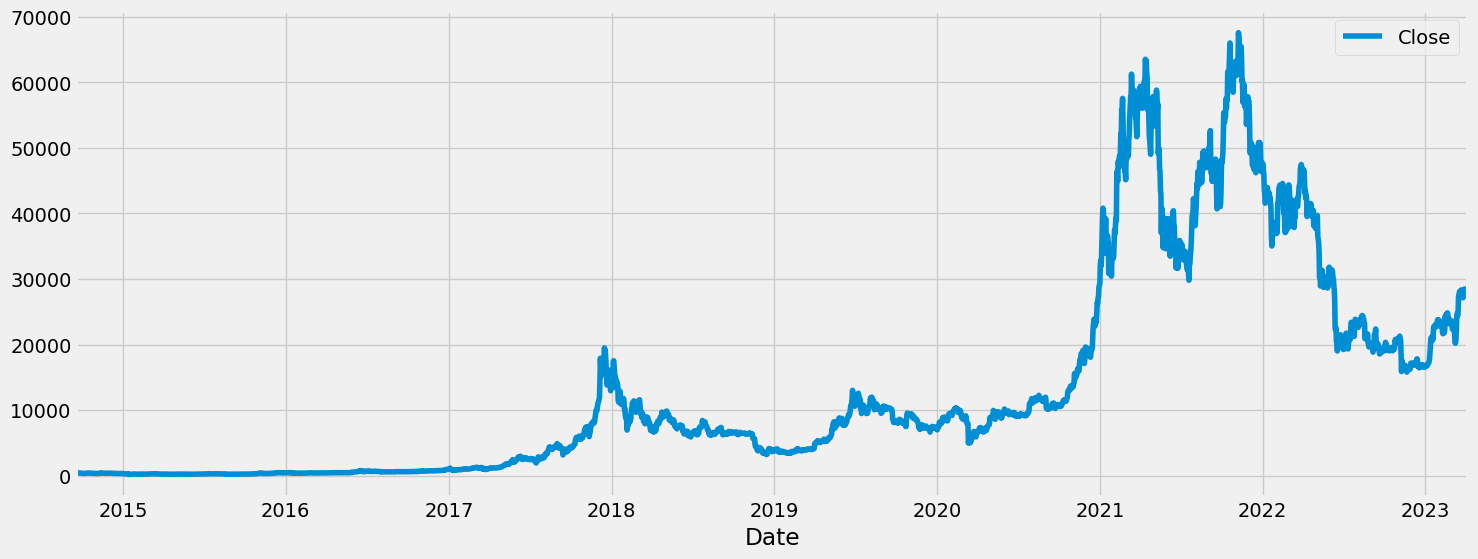

In [2]:
bitcoin = df.copy()
bitcoin['Date'] = pd.to_datetime(df["Date"], format = '%Y-%m-%d')
bitcoin = bitcoin.set_index('Date')
bitcoin[["Close"]].plot(figsize=(16, 6))

Для того, чтобы предсказать цену закрытия будем использовть только эти колонки: Open, High, Low, Close и Volume. И делим на датасеты.

In [3]:
X, y = df[["Open", "High", "Low", "Volume"]], df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Инициализируем модель и обучаем на линейной регрессии

In [4]:
linar_mod = LinearRegression()
linar_mod.fit(X_train, y_train)
for column, coef in zip(X_train.columns, linar_mod.coef_):
    print(column, coef)
print(linar_mod.intercept_)
linar_prediction = linar_mod.predict(X_train)

Open -0.5556600731583432
High 0.9119775014504635
Low 0.6383284021593052
Volume 1.1204571511020702e-10
5.308618320035748


In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_prediction = linar_mod.predict(X_test)
y_true = y_test

print('MSE = %s' %mean_squared_error(y_true, y_prediction))
print('MAE = %s' %mean_absolute_error(y_prediction, y_true))
print('r2_score = %s' %r2_score(y_true, y_prediction))

MSE = 79960.49646468546
MAE = 134.70318040868594
r2_score = 0.9996462908188289


In [6]:
df = pd.DataFrame(y_true.copy())
df['Prediction'] = y_prediction
df.head(10)

,Close,Prediction
817,780.556030,787.196438
2084,9529.803711,9687.552202
346,228.761002,233.627989
1765,10530.732422,10391.160782
1071,4334.680176,4334.069226
1929,7292.995117,7328.028248
291,269.029999,278.489538
801,732.034973,737.301656
2930,19222.671875,19090.257237
1613,3673.836182,3653.978635


Исходя из метрик, можно сказать, что моя модель ошибается в среднем на 134 доллара (МАЕ), что является достаточно неплохим результатом 